# CW2
## Hanlin Liu    02081102

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
from scipy.integrate import solve_ivp
from tqdm import tqdm
# plotting preferences updates
colors = ['#132A36', '#780627','#4692BD', '#079069']

# Set plotting parameters
params = {'figure.figsize': (6.0,6.0),
          'axes.labelsize': 16,
          'xtick.labelsize': 14,
          'ytick.labelsize': 14,
          'legend.fontsize': 12,
          'font.size': 12
           }

plt.rcParams.update(params)

-------------------------

# Problem 1

### 1(a)

For the system $\dot{x}=\lambda x+x^2 + x^3 := f(x)$, the fixed points are those where $f(x^*)=0$. So we have fixed point(s) $x^*=0$ for all $\lambda$ or $x^*=\dfrac{-1\pm \sqrt{1-4\lambda}}{2}$ for $\lambda \leq \dfrac{1}{4}$.

To determine the stability of fixed points, we need compute $f'(x^*)=\lambda + 2x^*+3{x^*}^2$.

When $x^*=0$, $f'(x^*)=\lambda$. If $\lambda<0 \implies f'(x^*)<0$, this fixed point is stable. If $\lambda>0 \implies f'(x^*)>0$, it is unstable.

When $x^*=\dfrac{-1 + \sqrt{1-4\lambda}}{2}$, $f'(x^*)=\dfrac{1}{2}-2\lambda -\dfrac{1}{2}\sqrt{1-4\lambda}$. If $0<\lambda<\dfrac{1}{4} \implies f'(x^*)<0$, it is stable. If $\lambda<0 \implies f'(x^*)>0$, it is unstable. 

When $x^*=\dfrac{-1 - \sqrt{1-4\lambda}}{2}$, $f'(x^*)=\dfrac{1}{2}-2\lambda +\dfrac{1}{2}\sqrt{1-4\lambda}$. If $\lambda<\dfrac{1}{4} \implies f'(x^*)>0$, so it is unstable.

### 1(b)

In [2]:
# Function to find the fixed points for the System
def bifurcation(lambda_vals):
    # Arrays to hold the fixed points and their stability
    x_fixed_points = []
    stability = []

    for lam in lambda_vals:
        lam = round(lam, 2)
        if lam < 0:
            # Three fixed points for negative lambda
            x1 = (-1 + np.sqrt(1-4*lam))/2
            x2 = (-1 - np.sqrt(1-4*lam))/2
            x_fixed_points.append([0, x1, x2])  # Stable at 0, unstable at x1 and x2
            stability.append(['stable', 'unstable', 'unstable'])
        elif lam == 0:
            # At λ = 0, 0 and x1 collide at x = 0, and one more fixed point at x2
            x2 = (-1 - np.sqrt(1-4*lam))/2
            x_fixed_points.append([0, x2])
            # Stability: Swap stability at 0, unstable at x2
            stability.append(['saddle','unstable'])
        elif 0<lam<1/4:
            # Three fixed points for this interval
            x1 = (-1 + np.sqrt(1-4*lam))/2
            x2 = (-1 - np.sqrt(1-4*lam))/2
            x_fixed_points.append([0, x1, x2])  # Stable at x1, unstable at 0 and x2
            stability.append(['unstable', 'stable', 'unstable'])
        elif lam == 0.25:
            # At λ = 0.25, x1 and x2 collide at x = -0.5, and one more fixed point at 0
            x_fixed_points.append([0,-0.5])  # unstable at 0, Swap stability at -0.5
            stability.append(['unstable','saddle'])
        else:
            x_fixed_points.append([0])  # unstable at 0
            stability.append(['unstable'])

    return x_fixed_points, stability

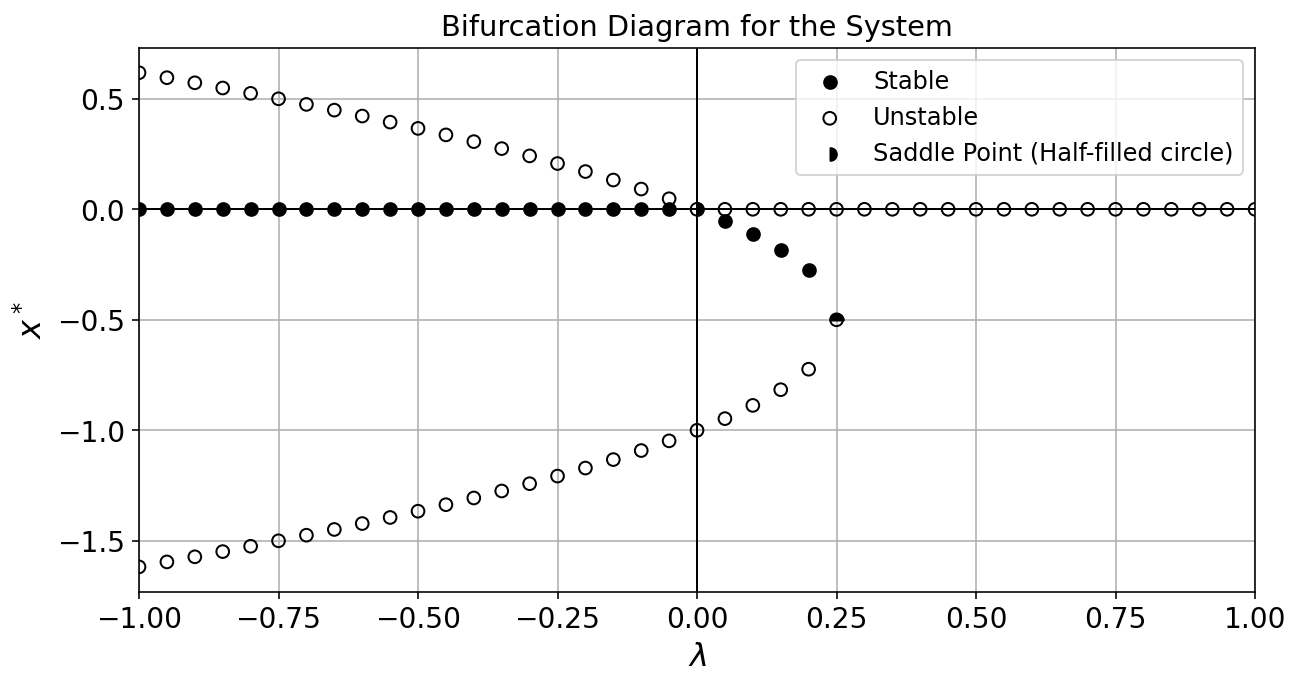

In [3]:
# Generate lambda values (control parameter)
lambda_vals = np.arange(-1, 1.1, 0.05)

# Compute fixed points and their stability
x_fixed_points, stability = bifurcation(lambda_vals)

# Plotting the bifurcation diagram
plt.figure(figsize=(10, 5))
for i, lam in enumerate(lambda_vals):
    lam = round(lam, 2)
    if lam < 0:
        # Three fixed points: one stable (filled circle) and two unstable (empty circle)
        plt.scatter(lam, x_fixed_points[i][0], zorder=2, color='k', s=40, edgecolor='k', label="Stable" if i == 0 else "")
        plt.scatter(lam, x_fixed_points[i][1], zorder=2, color='k', s=40, edgecolor='k',facecolor='none', label="Unstable" if i == 0 else "")
        plt.scatter(lam, x_fixed_points[i][2], zorder=2, color='k', s=40, edgecolor='k',facecolor='none')
    elif lam == 0:
        # At λ = 0, one saddle point and one unstable
        plt.scatter(0, 0, color='black', s=40, zorder=2, edgecolor='black', marker=MarkerStyle("o", fillstyle="right"), label="Saddle Point (Half-filled circle)")  # Saddle (half-filled circle)
        plt.scatter(0, 0, color='none', s=40, zorder=2, edgecolor='black', facecolor='none')  # Unstable (empty circle)
        plt.scatter(lam, x_fixed_points[i][1], zorder=2, color='k', s=40, edgecolor='k',facecolor='none', label="Unstable" if i == 0 else "")
    elif 0<lam<1/4:
        # three fixed points: one stable and two unstable
        plt.scatter(lam, x_fixed_points[i][0], zorder=2, color='k', s=40, edgecolor='k',facecolor='none', label="Unstable" if i == 0 else "")
        plt.scatter(lam, x_fixed_points[i][1], zorder=2, color='k', s=40, edgecolor='k', label="Stable" if i == 0 else "")
        plt.scatter(lam, x_fixed_points[i][2], zorder=2, color='k', s=40, edgecolor='k',facecolor='none', label="Unstable" if i == 0 else "")
    elif lam == 0.25:
        # at λ = 0.25, one saddle and one unstable
        plt.scatter(0.25, -0.5, color='black', s=40, zorder=2, edgecolor='black', marker=MarkerStyle("o", fillstyle="top"))  # Saddle (half-filled circle)
        plt.scatter(0.25, -0.5, color='none', s=40, zorder=2, edgecolor='black', facecolor='none')  # Unstable (empty circle)
        plt.scatter(0.25,0, zorder=2, color='k', s=40, edgecolor='k',facecolor='none')
    else:
        # one fixed point: unstable at 0
        plt.scatter(lam, 0, zorder=2, color='k', s=40, edgecolor='k',facecolor='none', label="Unstable" if i == 0 else "")  # Unstable (empty


plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.xlim(-1, 1)
plt.title('Bifurcation Diagram for the System')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$x^*$')
plt.grid(True)
plt.legend()
plt.show()

-----------------------------
# Problem 2
### 2(a)

In [4]:
# function of the system given
def MySystem(t, X, params):
    x,y,z,w = X
    a,b,c,d,e = params
    dx = -a*x + b*y - y*z
    dy = x + c*(w**2) +e
    dz = (y**2)-z
    dw = d*y
    return [dx,dy,dz,dw]

In [5]:
# time step
h = 0.01

# initial condition
ic = [1.0, 1.0, 1.0, 1.0]
# parameters
params = [2.0, 10.0, 0.1, 0.1, 1]
# Time span for the simulation
t_span = (0,100)
t_eval = np.arange(t_span[0], t_span[1], h)

# Solve the differential equations, this is our exact solution
sol = solve_ivp(MySystem, t_span, ic, args=(params,), t_eval=t_eval)
# solutions
x,y,z,w = sol.y

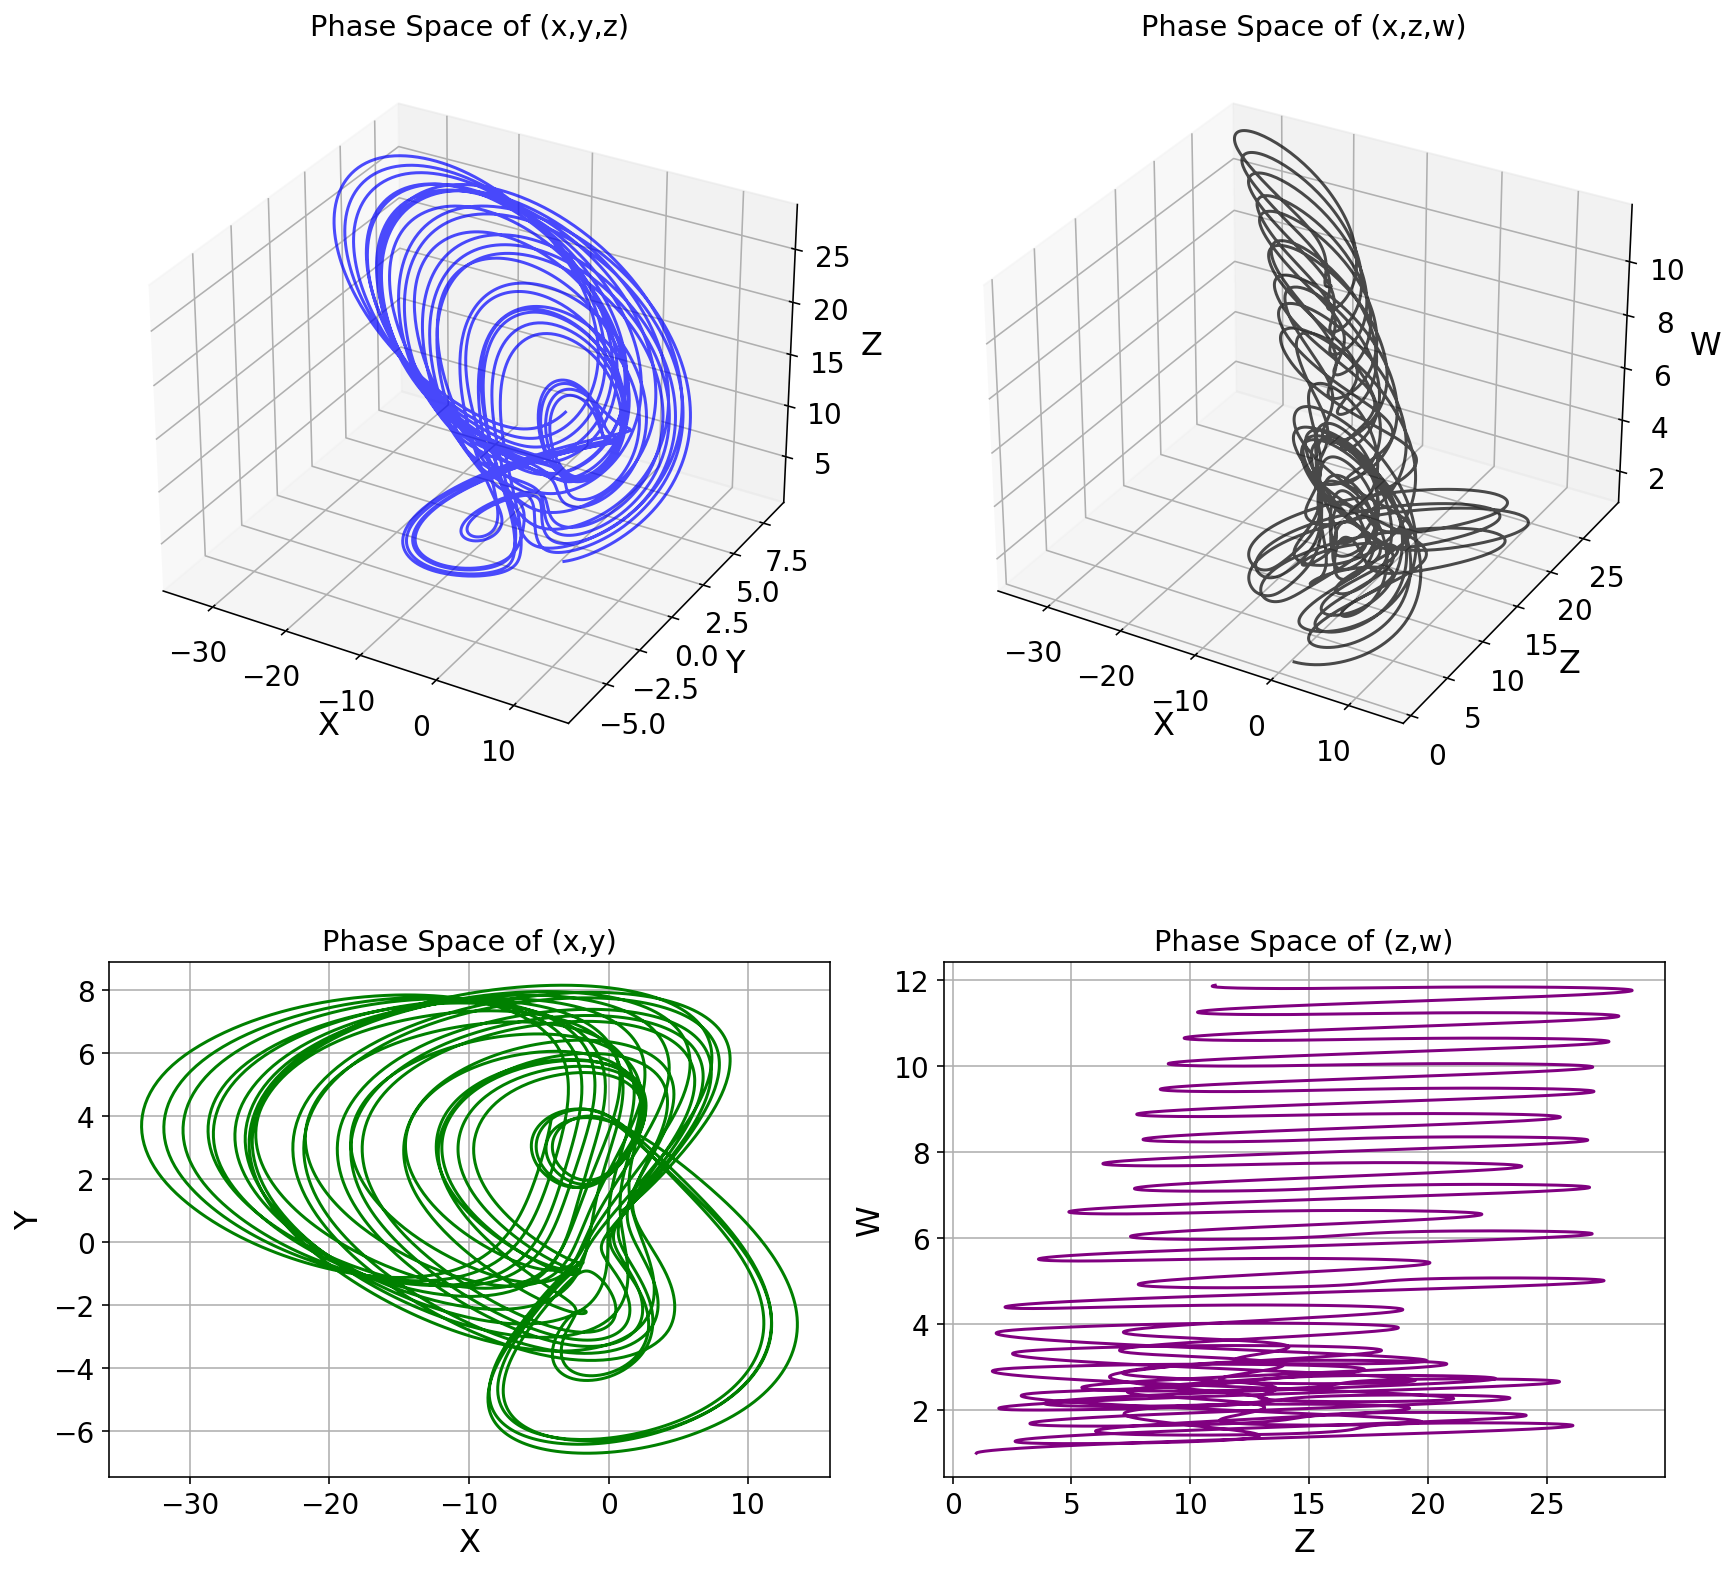

In [6]:
# Create the figure with a 6x6 grid layout
fig = plt.figure(figsize=(12,12))
gs = fig.add_gridspec(6,6)  # GridSpec for custom layout

# 3D Phase Space Plot of (x,y,z) (Occupies rows 0-4 and columns 0-3)
ax1 = fig.add_subplot(gs[0:4, 0:3], projection='3d')
ax1.plot(x, y, z, color='blue', alpha=0.7)
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("Z")
ax1.set_title("Phase Space of (x,y,z)")


# 3D Phase Space Plot of (x,z,w) (Occupies rows 0-4 and columns 3-5)
ax2 = fig.add_subplot(gs[0:4, 3:6], projection='3d')
ax2.plot(x, z, w, color='k', alpha=0.7)
ax2.set_xlabel("X")
ax2.set_ylabel("Z")
ax2.set_zlabel("W")
ax2.set_title("Phase Space of (x,z,w)")


# 2D Phase Space Plot of (x,y) (Occupies rows 4-6 and columns 0-3)
ax3 = fig.add_subplot(gs[4:6, 0:3])
ax3.plot(x, y, color='green')
ax3.set_xlabel("X")
ax3.set_ylabel("Y")
ax3.set_title("Phase Space of (x,y)")
ax3.grid(True)


# 2D Phase Space Plot of (z,w) (Occupies rows 4-6 and columns 3-5)
ax4 = fig.add_subplot(gs[4:6,3:6])
ax4.plot(z, w, color='purple')
ax4.set_xlabel("Z")
ax4.set_ylabel("W")
ax4.set_title("Phase Space of (z,w)")
ax4.grid(True)

plt.tight_layout()
plt.show()

### 2(b)

For this problem, we need the Jacobian matrix of the system, which is

$$ \textbf{J} = \begin{bmatrix} -a & b-z & -y & 0 \\ 1 & 0 & 0 & 2cw \\ 0 & 2y & -1 & 0\\0 & d & 0 & 0 \end{bmatrix}
$$


In [7]:
# Gram-Schmidt reorthogonalization function
def gram_schmidt(vectors):
    dim = vectors.shape[1]
    ortho_vectors = np.copy(vectors)
    norms = np.zeros(dim)

    for i in range(dim):
        for j in range(i):
            proj = np.dot(ortho_vectors[:, j], ortho_vectors[:, i]) * ortho_vectors[:, j]
            ortho_vectors[:, i] -= proj
        norms[i] = np.linalg.norm(ortho_vectors[:, i])
        ortho_vectors[:, i] /= norms[i]

    return ortho_vectors, norms

# Lyapunov spectrum calculation
def lyap_exp(f, dim, params, t_span, t_step, dt, x_0, transient=100):
    t_start, t_end = t_span
    timesteps = int(round((t_end - t_start) / t_step))
    y = np.hstack((x_0, np.eye(dim).flatten()))  # State + tangent vectors
    cum = np.zeros(dim)
    t = t_start

    # Integration and reorthogonalization loop
    for _ in range(timesteps):
        sol = solve_ivp(f, [t, t + t_step], y, args=(params,), max_step=dt)
        y = sol.y[:, -1]

        # Extract tangent vectors and reorthogonalize using Gram-Schmidt
        tangent_vectors = y[dim:].reshape(dim, dim).T
        ortho_vectors, norms = gram_schmidt(tangent_vectors)
        y[dim:] = ortho_vectors.T.flatten()

        # Accumulate logarithms of norms
        if t > transient:
            cum += np.log(norms)

        t += t_step

    # Return average Lyapunov exponents
    return cum / (t_end - t_start - transient)

# Function of the system given with the Jacobian matrix
def System_Jac(t, X, params):
    x,y,z,w = X[:4]
    Y = X[4:].reshape(4, 4).T
    a,b,c,d,e = params
    f = np.zeros(20)
    f[:4] = [-a*x + b*y - y*z, x + c*(w**2) +e,
            (y**2)-z, d*y]
    Jac = np.array([[-a, b-z, -y, 0],
                    [1, 0, 0, 2*c*w],
                    [0, 2*y, -1, 0],
                    [0, d, 0, 0]])
    f[4:] = (Jac @ Y).T.flatten()
    return f

In [8]:
params = (2.0, 10.0, 0.1, 0.1, 1) # parameters
x_0 = [1.0, 1.0, 1.0, 1.0]  # Initial condition
t_span = (0, 1000)  # Time span for integration
t_step = 0.1  # Integration step size
dt = 0.001  # Maximum step size
transient = 100  # Transient time to discard

# Storage for Lyapunov spectra
lyapunov_spectra = []

L = lyap_exp(System_Jac, dim=4, t_span=t_span, t_step=t_step, dt=dt, x_0=x_0, params=params, transient=transient)
lyapunov_spectra.append(L)

# Convert results to a numpy array for easy manipulation
lyapunov_spectra = np.array(lyapunov_spectra)

print('The Lyapunov Spectra of the system is: ', lyapunov_spectra)


The Lyapunov Spectra of the system is:  [[ 1.03251138e-02  1.34459050e-03 -4.52969039e-02 -2.96604889e+00]]


1. The **largest Lyapunov exponent (LLE)** is **positive** (1.03251138e-02), so the system is in a chaotic regime.
2. The **second** and **third** exponent are close to **zero**, representing motion along the attractor.
3. The **third exponent** is **negative**, indicating contraction to the attractor.

-------------------------

# Problem 3
### 3(a)

The fixed points are those points $(x^*, y^*)$ where $\dot{x}=\dot{y}=0$, so we need $\begin{cases}\lambda x^*-y^*-x^*({x^*}^2+{y^*}^2)=0\\ x^*+\lambda y^*-y^*({x^*}^2+{y^*}^2)=0\end{cases}$. If we multiply $y^*$ to the first equation and $x^*$ to the second one, we have $\begin{cases}\lambda x^*y^*-{y^*}^2-x^*y^*({x^*}^2+{y^*}^2)=0\\ {x^*}^2+\lambda x^*y^*-x^*y^*({x^*}^2+{y^*}^2)=0\end{cases}$. Then subtract the second from the first, we get ${x^*}^2 + {y^*}^2=0$. The only point satisfying this equation is $(x^*,y^*)=(0,0)$.

To determine its stability, we need eigenvalues of the Jacobian at the fixed point.
$$ \textbf{J}(x,y)=\begin{bmatrix} \lambda - 3x^2 - y^2 & -1-2xy \\ 1-2xy & \lambda -x^2-3y^2 \end{bmatrix} \implies \textbf{J}(0,0)= \begin{bmatrix} \lambda & -1 \\ 1 & \lambda \end{bmatrix}.$$

So the eigenvalues of $\textbf{J}(0,0)$ are $\lambda \pm i$. The stability of fixed point depends on sign of the real part of eigenvalues:
- If $\lambda<0$, all eigenvalues have **negative** real part, so it's stable.
- If $\lambda>0$, all eigenvalues have **positive** real part, so it's unstable.

### 3(b)
$$
\begin{align*}
r\dot{r} &=x\dot{x}+y\dot{y}= x(\lambda x-y-x(x^2+y^2)) + y(x+\lambda y-y(x^2+y^2))\\
&= \lambda x^2 -xy -x^2(x^2+y^2)+xy+\lambda y^2-y^2(x^2+y^2)\\
&= \lambda(x^2+y^2)-(x^2+y^2)^2\\
&=\lambda r^2 - r^4\\
\implies \dot{r}&=\lambda r - r^3
\end{align*}
$$
$$
\begin{align*}
r^2\dot{\theta} &=x\dot{y}-y\dot{x}= x(x+\lambda y-y(x^2+y^2)) - y(\lambda x-y-x(x^2+y^2))\\
&=  x^2 + \lambda xy -xy(x^2+y^2)-\lambda xy+ y^2 + xy(x^2+y^2)\\
&= x^2+y^2\\
&=r^2\\
\implies \dot{\theta}&=1
\end{align*}
$$

### 3(c)
$\dot{r}=\lambda r - r^3$, this is a **Supercritical Pitchfork Bifurcation**. However, notice that $r\geq0$, so we only have fixed points at $r=0$ and $r=\sqrt{\lambda}$.

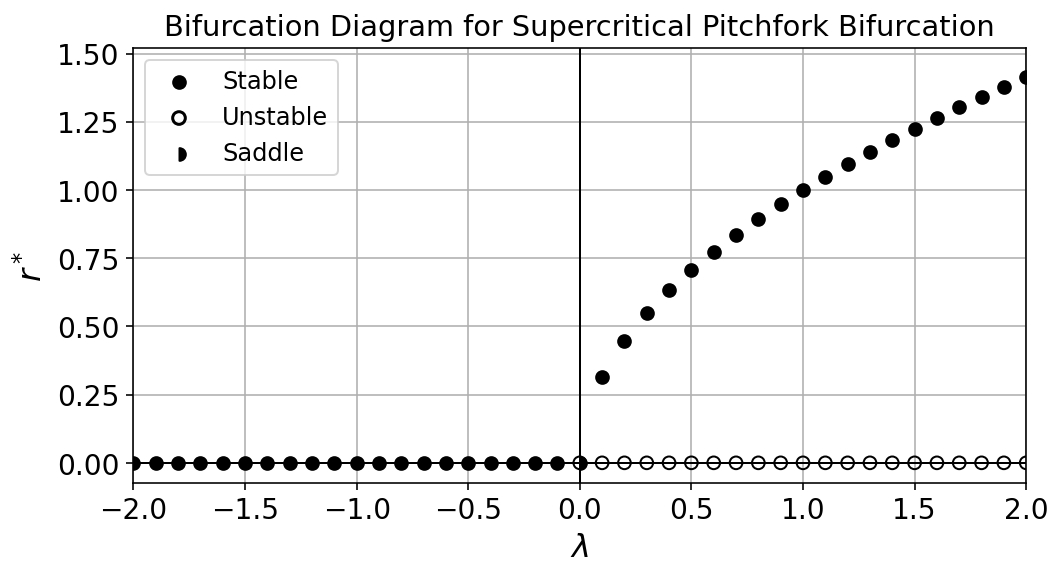

In [9]:
# Function to find the fixed points for the Supercritical Pitchfork Bifurcation
def supercritical_pitchfork_bifurcation_r(lambda_vals):
    x_fixed_points = []
    stability = []

    for lam in lambda_vals:
        lam = round(lam, 2)
        if lam < 0:
            # For λ < 0, there is only one stable fixed point at x = 0
            x_fixed_points.append([0])  # Stable at x = 0
            stability.append(['stable'])
        elif lam == 0:
            # At λ = 0, the system bifurcates to a saddle point and two symmetric stable fixed points appear at ±√λ
            x_fixed_points.append([0])  # Saddle point at x = 0
            stability.append(['saddle'])  # Bifurcation occurs
        else:
            # For λ > 0, the stable fixed points are at x = √λ and x = 0 is unstable
            x_fixed_points.append([np.sqrt(lam), 0])  # Stable at √λ, unstable at x = 0
            stability.append(['stable', 'unstable'])

    return x_fixed_points, stability

# Generate lambda values (control parameter)
lambda_vals = np.arange(-2, 2.2, 0.1)

# Compute fixed points and their stability
x_fixed_points, stability = supercritical_pitchfork_bifurcation_r(lambda_vals)

# Plotting the bifurcation diagram
plt.figure(figsize=(8, 4))
for i, lam in enumerate(lambda_vals):
    if len(x_fixed_points[i]) == 2:
        # Two fixed points: one stable (filled circles) and one unstable (empty circle)
        plt.scatter(lam, x_fixed_points[i][0], color='k', s=40, zorder=2, edgecolor='black', marker=MarkerStyle("o", fillstyle="full"))  # Stable (filled circle)
        plt.scatter(lam, x_fixed_points[i][1], color='none', s=40, edgecolor='black', facecolor='none', zorder=2)  # Unstable (empty circle)
    elif len(x_fixed_points[i]) == 1 and stability[i][0] == 'saddle':
        # At λ = 0, saddle point
        plt.scatter(0, 0, color='k', s=40, zorder=2, edgecolor='k', marker=MarkerStyle("o", fillstyle="right"))  # Saddle (half-filled circle)
        plt.scatter(0, 0, color='none', s=40, edgecolor='black', facecolor='none', zorder=2)
    elif len(x_fixed_points[i]) == 1 and stability[i][0] == 'stable':
        # For λ < 0, stable fixed point at x = 0
        plt.scatter(lam, 0, color='k', s=40, zorder=2, edgecolor='black', marker=MarkerStyle("o", fillstyle="full")) # Stable (filled circle)


# Axes, title, and grid
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.xlim(-2, 2)
plt.title('Bifurcation Diagram for Supercritical Pitchfork Bifurcation')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$r^*$')
plt.grid(True)

# Add a concise legend with only three entries
plt.scatter([], [], color='k', s=40, edgecolor='black', marker=MarkerStyle("o", fillstyle="full"), label='Stable')  # Stable (filled circle)
plt.scatter([], [], color='k', s=40, marker=MarkerStyle("o", fillstyle="none"), label='Unstable')  # Unstable (empty circle)
plt.scatter([], [], color='k', s=40, edgecolor='black', marker=MarkerStyle("o", fillstyle="right"), label='Saddle')  # Saddle (half-filled circle)

# Set legend
plt.legend(loc='upper left')

plt.show()

Since $\dot{r}=0$ at fixed points, the radius does not change. $\dot{\theta}==1$, so the rate of change in $\theta$ is constant.
- If $\lambda<0$, there is only a stable fixed point at the origin.
- If $\lambda>0$, there is a limit cycle with radius $\sqrt{\lambda}$. This is a periodic solution for the system.